In [1]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas

red_wines = pd.read_csv("winequality-red.csv", sep=";")
red_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
red_wines.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [4]:
# Assign X & y

X = red_wines.drop(["quality"], axis=1)
y= red_wines.quality

In [5]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7, stratify=y)

In [6]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1325,6.7,0.460,0.24,1.7,0.077,18.0,34.0,0.99480,3.39,0.60,10.6
445,9.5,0.735,0.10,2.1,0.079,6.0,31.0,0.99860,3.23,0.56,10.1
1122,6.3,0.470,0.00,1.4,0.055,27.0,33.0,0.99220,3.45,0.48,12.3
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
1159,10.2,0.410,0.43,2.2,0.110,11.0,37.0,0.99728,3.16,0.67,10.8


In [7]:
X_scaler= MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
classifier = LogisticRegression()

In [9]:
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(predictions)
print(classifier.classes_)

[5 6 6 6 6 5 5 5 5 6 6 6 5 5 5 6 5 6 6 6 6 5 6 6 6 5 5 6 6 5 6 6 6 6 6 5 6
 5 5 6 6 7 5 6 6 7 6 6 6 5 6 5 5 5 5 6 6 5 6 6 6 5 6 7 5 5 6 5 6 5 6 5 6 5
 5 5 6 5 6 6 5 6 5 5 6 6 6 5 6 6 6 6 6 6 6 6 6 5 6 5 5 6 5 5 5 6 5 6 6 6 6
 5 5 6 6 6 6 6 5 6 6 5 6 5 5 6 6 5 5 6 7 5 6 6 6 6 6 5 5 6 6 5 6 5 6 5 5 5
 6 5 6 5 6 5 6 5 5 6 6 5 6 6 6 6 6 6 5 6 6 6 6 6 6 5 6 6 6 6 7 5 6 5 5 6 5
 6 5 6 6 5 6 5 6 6 5 6 5 5 5 5 5 5 6 6 5 5 6 5 6 6 6 5 5 5 7 6 5 5 5 5 5 5
 5 6 6 5 6 5 5 5 5 6 6 6 6 5 6 5 6 6 5 6 5 5 6 5 5 5 5 5 5 5 6 5 5 6 6 5 5
 5 5 6 6 6 5 7 5 5 5 6 7 6 5 5 5 5 5 6 6 6 6 5 6 5 6 5 5 5 5 6 5 5 5 6 5 5
 6 5 7 5 6 5 6 6 6 6 5 5 5 5 5 5 6 6 5 7 6 6 6 6 5 5 5 6 5 5 6 6 7 5 5 6 6
 6 5 5 5 5 6 5 6 5 5 5 5 7 6 6 6 5 6 6 6 5 5 6 5 6 6 6 6 6 6 6 6 6 6 5 5 5
 5 6 5 5 5 5 6 6 6 5 6 5 5 6 5 5 5 5 5 5 6 6 5 6 5 5 6 6 6 6]
[3 4 5 6 7 8]


In [10]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.5829858215179317
Testing Data Score: 0.6175


In [11]:
print(classification_report(y_test, predictions, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        13
           5       0.68      0.75      0.71       170
           6       0.56      0.69      0.62       160
           7       0.75      0.18      0.29        50
           8       0.00      0.00      0.00         5

    accuracy                           0.62       400
   macro avg       0.33      0.27      0.27       400
weighted avg       0.60      0.62      0.58       400



In [12]:
cm = confusion_matrix(y_test,classifier.predict(X_test_scaled))
print(cm)

[[  0   0   2   0   0   0]
 [  0   0  10   3   0   0]
 [  0   0 127  43   0   0]
 [  0   0  47 111   2   0]
 [  0   0   2  39   9   0]
 [  0   0   0   4   1   0]]


In [13]:
from sklearn.metrics import plot_confusion_matrix

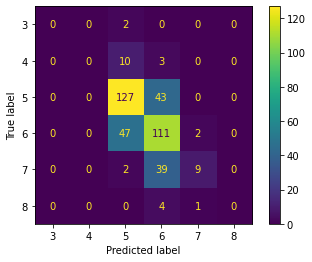

In [14]:
plot_confusion_matrix(classifier, X_test_scaled, y_test)

In [15]:
param_grid = {'C': [.01, 1, 10],
               'max_iter': [10,50,100,200,250,400],
               'penalty': ['elasticnet', 'l1', 'l2','none'],
               'dual': [True, False],
               'fit_intercept': [True, False],
               'class_weight': ['dict', 'balanced']
             }
grid_minmax = GridSearchCV(classifier, param_grid, verbose=3,)

In [16]:
grid_minmax.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, cl

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=d

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_valida

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=Tr

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dis

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=d

[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=elasticnet, scor

[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.402, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=el

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.383, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.402, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasti

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.454, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.404, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.392, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.418, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.200, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.250, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.192, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.205, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.417, total=   0.1s
[CV] C=0.0

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.458, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.421, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.400, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.435, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=ela

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.192, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.205, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.412, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.450, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.417, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.404, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.444, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, p

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.408, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.450, total=   0.3s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.412, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.404, total=   0.3s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.435, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, p

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.396, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.425, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.371, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.371, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.414, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, pe

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.404, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.421, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.375, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.375, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.402, total=   0.1s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_it

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.404, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.417, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.375, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.375, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.406, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_it

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.417, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.375, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.375, total=   0.2s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.406, total=   0.2s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, cl

[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=Tr

[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.379, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.358, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.421, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.312, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.356, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_i

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.400, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.454, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.446, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.383, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.402, total=   0.0s
[CV] C=1, class_weight=balanced,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.379, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.358, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.421, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.312, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.356, total=   0.1s
[CV] C=1, class_weight=balanced, dual=Fal

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.404, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.392, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.418, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.379, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.358, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.421, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.312, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.356, total=   0.1s
[CV] C=1, class_weight=balanced, dual=Fal

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.458, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.421, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.400, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.435, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total= 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.379, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.358, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.421, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.312, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.356, total=   0.0s
[CV] C=1, class_weight=balanced, dual=Fal

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.412, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.450, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.417, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.404, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.444, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total= 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.379, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.358, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fi

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.408, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.450, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.412, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.404, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.435, total=   0.3s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=na

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.317, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.338, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.308, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.310, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.375, total=   0.0s
[CV] C=1, class_weight=balanced, dual

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.446, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.362, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.375, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.406, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, c

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.425, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.371, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.371, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.414, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.404, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.421, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.375, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.375, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.402, total=   0.1s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.404, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.417, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.375, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.375, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.406, total=   0.2s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dis

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_ite

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1417, in fit
    for class_, warm_start_coef_ in zip(classes_, warm_start_coef))
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packag

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=F

[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.408, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.342, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.347, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.463, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.371, total=   0.0s
[CV] C=10, class_weight=balanced,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.408, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.446, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.371, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.402, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.400, total=   0.0s
[CV] C=10, class_weight=balanced, dua

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.446, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.383, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.402, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.408, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.446, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.392, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.402, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.412, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.454, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.404, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.392, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.418, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=  

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.412, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.408, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.442, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.392, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.402, total=   0.1s
[CV] C=10, class_weight=balanced

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.458, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.421, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.400, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.435, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.450, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.417, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.404, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.444, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.408, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.450, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.412, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.404, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.435, total=   0.3s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.383, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.417, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.388, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.379, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.372, total=   0.0s
[CV] C=10, class_weight=balanced

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.375, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.406, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, sco

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.408, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.388, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.371, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.368, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.396, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.425, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.371, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.371, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.414, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.421, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.375, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.375, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.402, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.417, total=   0.1s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.375, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.375, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.406, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=el

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.404, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.417, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.375, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.375, total=   0.2s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.406, total=   0.2s


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=1)]: Done 2880 out of 2880 | elapsed:   30.1s finished
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 1, 10],
                         'class_weight': ['dict', 'balanced'],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [10, 50, 100, 200, 250, 400],
                         'penalty': ['elasticnet', 'l1', 'l2', 'none']},
             verbose=3)

In [17]:
print(grid_minmax.best_params_)
print(grid_minmax.best_score_)



{'C': 0.01, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'max_iter': 200, 'penalty': 'none'}
0.4261959553695956


In [18]:
# Training Score
grid_minmax.score(X_train_scaled, y_train)

0.4370308590492077

In [19]:
# Testing Score
grid_minmax.score(X_test_scaled, y_test)

0.425

got similar results with hyper tuning this model with MInMaxSCaler, will try another model